# In this notebook
- understand the boundary of DL and other concepts
- able to build a DL NN
- validate DL model


In [1]:
#import libraries

from utils.model import *
from utils.opt_func import *
from utils.testCases import *
from config import nn_config

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
#import skimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


# What is DL 

Deep learning = artificial neural network (ANN) with >1 hidden layer

for example shallow neural network for a binary target:

| Input Layer  | Hidden Layer | Output Layer |
| ----------- | ----------- |----------- | 
| $x_1, x_2$  | unit1 = $\beta_{01} + \beta_{11}x_1+\beta_{12}x_2$|$\beta_0+\beta_1\tanh(unit_1)+\beta_2\tanh(unit_2)+ \beta_3\tanh(unit_3)$|
|   |   unit2 =  $\beta_{02} + \beta_{12}x_1 + \beta_{22}x_2$   |    |
|   | unit3 =  $\beta_{03} + \beta_{13}x_1 +\beta_{23}x_2$      |    |

formula：

$logit(E(y)) = \beta_0+\beta_1\tanh(\beta_{01} + \beta_{11}x_1+\beta_{12}x_2)+\beta_2\tanh(\beta_{02} + \beta_{12}x_1 + \beta_{22}x_2)+ \beta_3\tanh(\beta_{03} + \beta_{13}x_1 +\beta_{23}x_2)$

loss function:

$ \hat{\beta} = argmin_{\beta}-\sum^n_{i=1} y_i ln(\hat{y_i}(\beta)) +  (1-y_i)ln(1-\hat{y_i}(\beta)) $


for a deep neural network for binary target:


| Input Layer  | Hidden Layer 1 | Hidden Layer 2 | Output Layer |
| ----------- | ----------- |----------- |----------- | 
| $x_1, x_2$  | unit_{11} = $\beta_{011} + \beta_{111}x_1+\beta_{211}x_2$| unit_1 = $\beta_{012} + \beta_{112}\tanh(unit_{11})+\beta_{212}\tanh(unit_{12})+ \beta_{312}\tanh(unit_{13})$ | $\beta_0 +\beta_1 \tanh (unit_1) + \beta_2 \tanh(unit_2)$  |
|   |   unit_{12} = $\beta_{021} + \beta_{121}x_1+\beta_{221}x_2$   |  unit_2 = $\beta_{022} + \beta_{122}\tanh(unit_{11})+\beta_{222}\tanh(unit_{12})+ \beta_{322}\tanh(unit_{13})$  ||
|   | unit_{13} = $\beta_{031} + \beta_{131}x_1+\beta_{231}x_2$      |    | |


formula：

$logit(E(y)) = \beta_0+\beta_1 \big\{ \tanh(\beta_{012} + \beta_{112}\tanh(unit_{11})+\beta_{212}\tanh(unit_{12})+ \beta_{312}\tanh(unit_{13}))+\beta_2 \big\{ \tanh(\beta_{022} + \beta_{122}\tanh(unit_{11})+\beta_{222}\tanh(unit_{12})+ \beta_{322}\tanh(unit_{13}))$

loss function:

$ \hat{\beta} = argmin_{\beta}-\sum^n_{i=1} y_i ln(\hat{y_i}(\beta)) +  (1-y_i)ln(1-\hat{y_i}(\beta)) $


- reflect to other mathemetical algorithms and models?
  - sequencial model, feature learning, activation function, kernel regression
  
- what is the typical training process ?
  - initialization : 
    get $\beta^{0},
  
  - parameter setting:
      
      weghts = ${\beta_1, \beta_{11}, \beta_{21}, \beta_{11}, \beta_{2}, \beta_{12}, \beta_{22}, \beta_{3}, \beta_{13}, \beta_{23}}$
      
      biases = ${\beta_0, \beta_{01}, \beta_{02}, \beta_{03}}$
  
  - optimization:
      
    $\hat{\beta} = argmin_{\beta} \epsilon (\beta)$
        
    $ \beta^{(k+1)} = \beta^{(k)} + \epsilon^{(k)} $ (step size and direction) 
  
  
  
- best use cases?
  - NLP, imagine recognition etc 

In [2]:

# slide and plots for demo here



# How to prepare data for DL
- dimension
- train, test, validation split

In [3]:

#read data
DATA_PATH = '/Users/yudiwang/Desktop/playground/deep_learning_comparative_study/exercises/data/'

train_x_orig, train_y, test_x_orig, test_y, classes = load_data(DATA_PATH)

# check data dimension
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))



train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# How to build a DL Network?
- NN
- CNN
- RNN
etc

## Define loss function
- Regression: MSE, RMSE
- Binary: log loss

## Convert ML to Opt for DNN
Goal is to minimize expected loss on training set
- SGD 
- Local minima myth from spurious surface of DNN
- AdaGrad, RMSProp, Adam : difference in adaptivity
- Bring in Hession for global opt: LBFGS 

$\hat{\beta} = argmin_{\beta} \epsilon (\beta)$
        
$ \beta^{(k+1)} = \beta^{(k)} + \delta^{(k)} $ (step size and direction) 

- batch gradient descent, first order: 
$ \delta^{(k)}  = -\eta \frac{\nabla\epsilon(\beta^{(k)})}{\nabla\beta} $

- backpropagation, first order:
$ \delta^{(k)} = -\eta \frac{\nabla\epsilon(\beta^{(k)})}{\nabla\beta} + \alpha \delta^{(k-1)}$

- modiofied Newton
$ \delta^{(k)} = -\rho^{(k)} \big\{\frac{\delta^2\epsilon(\beta^{(k)})}{\delta\beta\delta\beta'} \big\}^{(-1)} \frac{\delta \epsilon(\beta^{(k)})}{\delta\beta} $

- quasi-Newton
$ \delta^{(k)} = -\rho^{(k)} B^{(k)} \frac{\delta \epsilon(\beta^{(k)})}{\delta\beta} $



## step1: initial parameter

In [4]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


## step 2: forward computing for feature processing

In [5]:
#forward computing
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))


With sigmoid: A = [[0.96890023 0.11013289]]


## step 3: compute cost

In [6]:
#compute cost
Y, AL = compute_cost_test_case()

print("cost = " + str(loss_function(AL, Y)))

cost = 0.41493159961539694


## step 4: backward computing

In [7]:
#backward computing
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]



## step 5: update parameter and convert to optimization

In [8]:
#update parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


## step 6: define model and train and get result

Cost after iteration 0: 0.6972515266984297
Cost after iteration 100: 0.6258189987064959
Cost after iteration 200: 0.5605784060355862
Cost after iteration 300: 0.47831279192181125
Cost after iteration 400: 0.4526603729238983
Cost after iteration 500: 0.4117255706045356
Cost after iteration 600: 0.3852504336082606
Cost after iteration 700: 0.3231118569806582
Cost after iteration 800: 0.27645830994028087
Cost after iteration 900: 0.2298164725400055
Cost after iteration 1000: 0.20493986146142718
Cost after iteration 1100: 0.14833542043020975
Cost after iteration 1200: 0.12379884037384455
Cost after iteration 1300: 0.3627589556997483
Cost after iteration 1400: 0.09626278773471086
Cost after iteration 1500: 0.08190948311294277
Cost after iteration 1600: 0.07132282993992237
Cost after iteration 1700: 0.06314932895996458
Cost after iteration 1800: 0.05612670144299609
Cost after iteration 1900: 0.04983386622727822
Cost after iteration 2000: 0.04518876152270858
Cost after iteration 2100: 0.04124

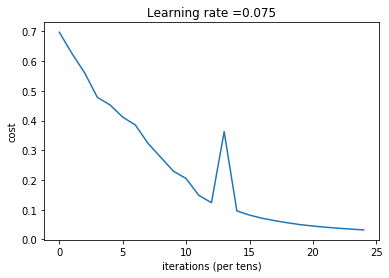

In [9]:
# could be furtherly improve for tuning

#put things together

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)


def two_layer_model(X, Y, layers_dims, learning_rate = 0.075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='sigmoid')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = loss_function(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='sigmoid')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


## step 8: make prediction

In [10]:

predictions_train = predict(train_x, train_y, parameters)


pred_test = predict(test_x, test_y, parameters)


print_mislabeled_images(classes, test_x, test_y, pred_test)



Accuracy: 0.9999999999999998
Accuracy: 0.72


ValueError: operands could not be broadcast together with shapes (2,) (1,50) 

## result analysis and potential problems
- test error too large : due to feature transformation not viable enough

## perform fine tuning
- learning rate - loss plot

In [ ]:
LEARNING_RATE_LIST = [0.05, 0.075, 0.1]
pred_test = []

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    acc = np.sum((p == y)/m)
    print("Accuracy: "  + str(acc))
        
    return p, acc
                 
for lr in LEARNING_RATE_LIST:
    parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = lr, num_iterations = 2500, print_cost=False)
    pred_test.append(predict(test_x, test_y, parameters)[1])
    
print(pred_test)
# plot the cost
plt.plot(LEARNING_RATE_LIST, pred_test)
plt.ylabel('prediction accuracy')
plt.xlabel('learning rate)')
plt.title("Learning rate =" + str(LEARNING_RATE_LIST))
plt.show()

# Let's build a CNN model to improve model performance !
  
 - best for grid like topology 2D image
 - convolution and pooling
 - slide filter and feature map, sparse interaction
 - design structure
 - image recognition and pattern recognition etc
    


- Convolution functions, including:
    - Zero Padding
    - Convolve window 
    - Convolution forward
    - Convolution backward (optional)
- Pooling functions, including:
    - Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward (optional)
    


In [ ]:

def zero_pad(X, pad):
    '''
    Padding for height and width for convolutional layer

    Arg
    ---
    X:    image matrix with shape (m, n_H, n_W, n_C), m number of images, n_C number of convolutional layer
    pad:  padding shape, added at both n_H and n_W
    
    Output
    ------
    X_pad: padded convolutional layer
    
    '''
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values = 0)

    
    return X_pad


In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape) #filled dimension with 0 on both side
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

## convolution
- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)


In [ ]:
def conv_step(X, W, b):
    '''
    Apply one filter defined by parameters W on slice of input image X of the output activation of the previous layer.
    
    Arg
    ---
    X : input data with shape (m, n , n_C)
    W : convolutional weight (m ,n , n_C)
    b : noise to add on convolutional layer
    
    Output
    ------
    X_conv
    
    '''
    X_conv = np.multiply(X, W)
    X_conv = np.sum(X_conv)
    X_conv = X_conv + float(b)
    
    
    return X_conv

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_step(a_slice_prev, W, b)
print("Z =", Z)

## convolution forward

- what is the expected output shape

- what is the number of layers after output

The formulas relating the output shape of the convolution to the input shape is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

- how to calculate backward for optimization


In [ ]:

def conv_forward(A_prev, W, b, hparameters):
    '''
    
    Arg
    ---
    A_prev        : previous layer activation, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W             : weights, numpy array of shape (f, f, n_C_prev, n_C)
    b             : biases, numpy array of shape (1, 1, 1, n_C)
    hparameters   : python dictionary containing 'stride' and 'pad'
    
    Output
    ------
    Z     : convolutional output, numpy array of shape (m, n_H, n_W, n_C)
    cache : cache of values needed for the convolutional backward function
    
    '''
    #get shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    #get weights shape
    (f, f, n_C_prev, n_C) = W.shape
    
    #get hyper parameters
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    #get output shape
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1 #horizontal
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1 #vertical shape
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad) #initial padding
    
    #loop through all images and convolution dimensions
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_step(a_slice_prev, W[...,c], b[...,c])
                    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache


In [ ]:

np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])


## pooling

Instead of convolution, we could also do pooling to retrive the information in each slice 

**Exercise**: Implement the forward pass of the pooling layer. Follow the hints in the comments below.

**Reminder**:
As there's no padding, the formulas binding the output shape of the pooling to the input shape is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$


In [ ]:


def pooling_forward(A_prev, hparameters, mode = "max"):
    '''
    
    Arg
    ---
    A_prev        : previous layer activation, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters   : python dictionary containing 'stride' and 'f'
    mode          : the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Output
    ------
    Z     : convolutional output, numpy array of shape (m, n_H, n_W, n_C)
    cache : cache of values needed for the convolutional backward function
    
    '''
    #get shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    #get hyper parameters
    f = hparameters['f']
    stride = hparameters['stride']
    
    #get output shape
    n_H = int((n_H_prev - f ) / stride) + 1 #horizontal
    n_W = int((n_W_prev - f ) / stride) + 1 #vertical shape
    n_C = n_C_prev
    
    #initiate output matrix Z
    Z = np.zeros((m, n_H, n_W, n_C))
    
    #loop through all images and convolution dimensions
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        Z[i, h, w, c] = np.max(a_slice_prev)
                    elif mode == "average":
                        Z[i, h, w, c] = np.mean(a_slice_prev)
                    
                    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, hparameters)
    
    return Z, cache



In [ ]:

np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
#print(A_prev)
hparameters = {"stride" : 2, "f": 3}

A, cache = pooling_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pooling_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)


## backpropagation in DL

### Convolutional layer backward pass 

Let's start by implementing the backward pass for a CONV layer. 

#### Computing dA:
This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

Where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the hth row and wth column (corresponding to the dot product taken at the ith stride left and jth stride down). Note that at each time, we multiply the the same filter $W_c$ by a different dZ when updating dA. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore when computing the backprop for dA, we are just adding the gradients of all the a_slices. 

In code, inside the appropriate for-loops, this formula translates into:
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

#### Computing dW:
This is the formula for computing $dW_c$ ($dW_c$ is the derivative of one filter) with respect to the loss:

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Where $a_{slice}$ corresponds to the slice which was used to generate the acitivation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$. 

In code, inside the appropriate for-loops, this formula translates into:
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

####  Computing db:

This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:

$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

As you have previously seen in basic neural networks, db is computed by summing $dZ$. In this case, you are just summing over all the gradients of the conv output (Z) with respect to the cost. 

In code, inside the appropriate for-loops, this formula translates into:
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

**Exercise**: Implement the `conv_backward` function below. You should sum over all the training examples, filters, heights, and widths. You should then compute the derivatives using formulas 1, 2 and 3 above. 
    

In [ ]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db



In [ ]:
#test
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

In [ ]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = x == np.max(x)
    ### END CODE HERE ###
    
    return mask

def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = dz / (n_H * n_W)
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * average
    ### END CODE HERE ###
    
    return a




In [ ]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):                       # loop over the training examples
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        # Get the value a from dA (≈1 line)
                        da = dA[i, h, w, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev


In [ ]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

## put things together and build a model

In [ ]:


def conv_model(A, hparameter, **kwargs):
    '''
    TODO
    ----
    finish convolution function for DL
    
    '''
    
    #get shape of parameter
    
    #initiate
    
    #feature transformation
    
    #conv layer
    
    #pooling
    
    
    #optimization
    #forward - backward
    
    #assert shape
    
    #output
    
    return


# Training and parameter tuning for DL
- optimization
- parameter tuning
- best training practice

# What are the evaluation metrics?
- Supervised
    - Regression
    - Classificatiohn
- Unsupervised
    - clustering
    - etc
    
# How to make prediction?
- Regression
- Classification

# How to extrapolate information? 
- Final tuned parameter set
- etc

# What is missing?
- state-of-art optimization
- new NN design for new data : blockchain network
   

## *Reference*
- [Opt for traning DNN](https://drive.google.com/file/d/1VKxvVy1OZbor5PjfTEQYuBzTOWu1VQwG/view?usp=sharing)